### 1. Import excel RCTool raw data and clean the data

In [1]:
import pandas as pd

In [3]:
df_RCTool = pd.read_excel(r'C:\Users\hancu\OneDrive - Nokia\ciprian\Various\backup\TT\RCTool_POC_component_P04_v2.xlsx')

In [4]:
df_RCTool.shape

(31278, 22)

In [5]:
df_RCTool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31278 entries, 0 to 31277
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   SN Week of year                31278 non-null  int64         
 1   SN Year                        31278 non-null  int64         
 2   Unitsno                        31278 non-null  object        
 3   Dbo Unit Repair.Unitrepairkey  31278 non-null  int64         
 4   Dbo Module.Unitrepairkey       31278 non-null  int64         
 5   Material Code                  31278 non-null  object        
 6   Material Name                  31278 non-null  object        
 7   Modulekey                      31278 non-null  int64         
 8   Modulesno                      22595 non-null  object        
 9   Compmaker                      172 non-null    object        
 10  Moduleitemcode                 22595 non-null  object        
 11  Modulefaultdesc

In [6]:
df_RCTool.isnull().sum()

SN Week of year                      0
SN Year                              0
Unitsno                              0
Dbo Unit Repair.Unitrepairkey        0
Dbo Module.Unitrepairkey             0
Material Code                        0
Material Name                        0
Modulekey                            0
Modulesno                         8683
Compmaker                        31106
Moduleitemcode                    8683
Modulefaultdesc                   5557
Compcode                             0
Compid                               0
Compfaultcode                        0
Compfaultdesc                        0
Dispatchfromrsite                    0
Scrap                                0
Rsiteid                              0
Fault Code                           0
Week of Year                         0
Manufactory                          0
dtype: int64

In [7]:
# drop 'Compmaker' since contains mainly blanks
df_RCTool.drop('Compmaker', axis=1, inplace=True)

In [8]:
#drop all lines containing blanks 
df_RCTool.dropna(axis=0, inplace=True)

In [9]:
df_RCTool.shape

(17038, 21)

In [10]:
df_RCTool.head()

,SN Week of year,SN Year,Unitsno,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Material Code,Material Name,Modulekey,Modulesno,Moduleitemcode,...,Compcode,Compid,Compfaultcode,Compfaultdesc,Dispatchfromrsite,Scrap,Rsiteid,Fault Code,Week of Year,Manufactory
0,41,2017,6Q174113376,10929139,10929139,473095A.203,ASIA,6576293,6Q174003231,087338A.104,...,1431325,R73000,U,SUI specified component to be added or replace...,2021-04-21,0,1000000124,36,17,6Q
1,41,2017,6Q174113376,10929139,10929139,473095A.203,ASIA,6576293,6Q174003231,087338A.104,...,1431325,R73001,U,SUI specified component to be added or replace...,2021-04-21,0,1000000124,36,17,6Q
2,41,2017,6Q174113376,10929139,10929139,473095A.203,ASIA,6576293,6Q174003231,087338A.104,...,1439064,R38008,U,SUI specified component to be added or replace...,2021-04-21,0,1000000124,36,17,6Q
3,41,2017,6Q174113376,10929139,10929139,473095A.203,ASIA,6576293,6Q174003231,087338A.104,...,1439064,R38009,U,SUI specified component to be added or replace...,2021-04-21,0,1000000124,36,17,6Q
4,41,2017,6Q174113376,10929139,10929139,473095A.203,ASIA,6576293,6Q174003231,087338A.104,...,1439064,R73019,U,SUI specified component to be added or replace...,2021-04-21,0,1000000124,36,17,6Q


### 2. Split the dataset into 2 datasets:
#### - one with categorical variables
#### - and a second one with numerical variables

In [11]:
df_RCTool.select_dtypes(include=['object']).columns.tolist()

['Unitsno',
 'Material Code',
 'Material Name',
 'Modulesno',
 'Moduleitemcode',
 'Modulefaultdesc',
 'Compcode',
 'Compid',
 'Compfaultcode',
 'Compfaultdesc',
 'Rsiteid',
 'Manufactory']

In [12]:
df_RCTool.select_dtypes(exclude=['object']).columns.tolist()

['SN Week of year',
 'SN Year',
 'Dbo Unit Repair.Unitrepairkey',
 'Dbo Module.Unitrepairkey',
 'Modulekey',
 'Dispatchfromrsite',
 'Scrap',
 'Fault Code',
 'Week of Year']

In [13]:
df_RCTool_categorical = pd.DataFrame(df_RCTool, columns=['Unitsno','Material Code', 'Material Name', 'Modulesno', 'Moduleitemcode',
 'Modulefaultdesc', 'Compcode', 'Compid', 'Compfaultcode', 'Compfaultdesc', 'Rsiteid', 'Manufactory'])
df_RCTool_categorical.sample(5)

,Unitsno,Material Code,Material Name,Modulesno,Moduleitemcode,Modulefaultdesc,Compcode,Compid,Compfaultcode,Compfaultdesc,Rsiteid,Manufactory
8739,6Q181428642,473914A.102,AZNA,6Q181419635,088600A.103,"SUI 101, SUI 301, SUI 302, SUI 303 DONE\nD1900...",2321101,C19013,U,SUI specified component to be added or replace...,1000000173,6Q
9253,6Q181504580,473914A.102,AZNA,6Q181524836,088600A.103,"SUI 101, SUI 301, SUI 302, SUI 303 DONE\nD1900...",P490776,R19058,U,SUI specified component to be added or replace...,1000000173,6Q
12330,6Q182004954,473941A.101,AZHA,6Q181924481,088996A.104,"SUI 102, 101 DONE\nTESTED OK",1431606,R5019,U,SUI specified component to be added or replace...,1000000173,6Q
19274,6Q184308589,473941A.101,AZHA,6Q184329659,088996A.104,SUI 102 DONE TESTED OK,P189931,C5015,U,SUI specified component to be added or replace...,1000000173,6Q
11319,6Q181707473,473914A.102,AZNA,6Q181635056,088554A.104,SUI 201 DONE\nTESTED OK,1431606,R5015,U,SUI specified component to be added or replace...,1000000173,6Q


In [14]:
df_RCTool_numerical = pd.DataFrame(df_RCTool, columns=['SN Week of year',
 'SN Year', 'Dbo Unit Repair.Unitrepairkey', 'Dbo Module.Unitrepairkey', 'Modulekey', 'Dispatchfromrsite', 'Scrap',
 'Fault Code', 'Week of Year'])
df_RCTool_numerical.sample(5)

,SN Week of year,SN Year,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Modulekey,Dispatchfromrsite,Scrap,Fault Code,Week of Year
16920,31,2018,10910902,10910902,6573579,2021-04-15,0,36,16
25520,24,2018,10582966,10582966,6587071,2021-04-21,0,55,17
17984,35,2018,10455337,10455337,6542841,2021-04-01,0,36,14
866,1,2018,10794987,10794987,6546989,2021-04-05,0,55,15
1815,2,2018,10948532,10948532,6547714,2021-04-05,0,55,15


## 3. Plot some examples of an associations heat-map

In [15]:
from sklearn import datasets
from dython.nominal import associations
import matplotlib.pyplot as plt

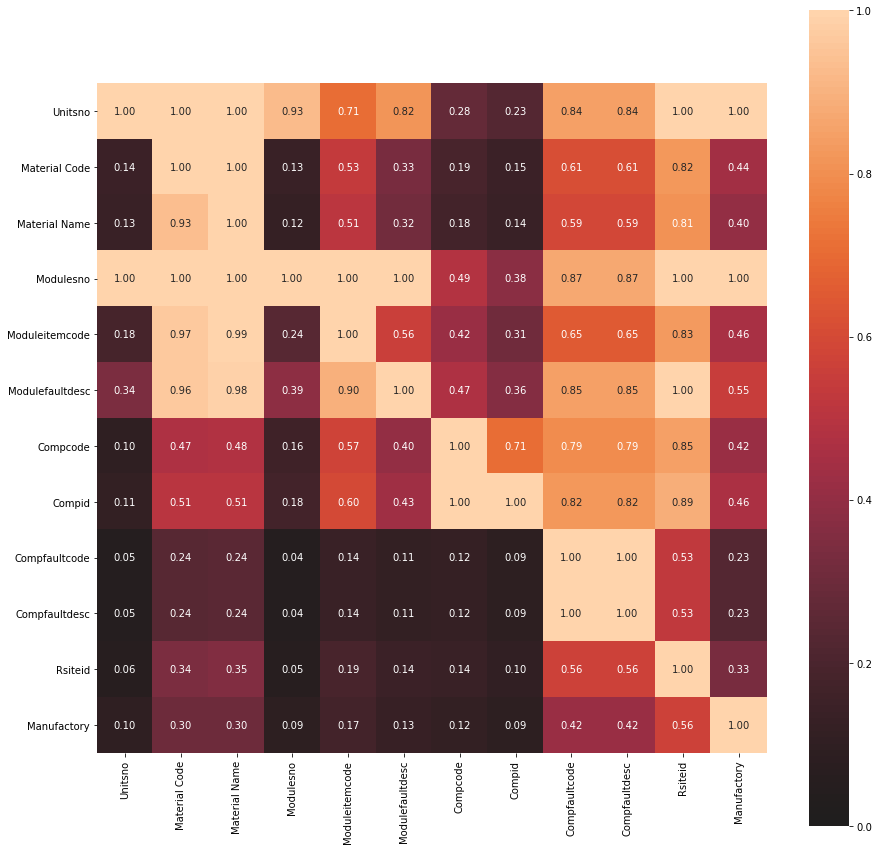

{'corr':                   Unitsno  Material Code  Material Name  Modulesno  \
 Unitsno          1.000000       1.000000       1.000000   0.929374   
 Material Code    0.143909       1.000000       1.000000   0.133761   
 Material Name    0.134252       0.932895       1.000000   0.124785   
 Modulesno        0.999886       1.000000       1.000000   1.000000   
 Moduleitemcode   0.184646       0.967297       0.993382   0.241864   
 Modulefaultdesc  0.342131       0.964733       0.984448   0.388309   
 Compcode         0.099536       0.469852       0.476938   0.163021   
 Compid           0.114124       0.506744       0.506737   0.176660   
 Compfaultcode    0.046667       0.235739       0.242275   0.044581   
 Compfaultdesc    0.046667       0.235739       0.242275   0.044581   
 Rsiteid          0.058861       0.336346       0.353325   0.054710   
 Manufactory      0.099077       0.302267       0.297712   0.092090   
 
                  Moduleitemcode  Modulefaultdesc  Compcode    Comp

In [16]:
# Calculate the correlation/strength-of-association of features in data-set
# with categorical features using:
# Cramer's V or Theil's U for categorical-categorical cases

associations(df_RCTool_categorical, nom_nom_assoc='theil', figsize=(15, 15), cmap=None, cbar=True)

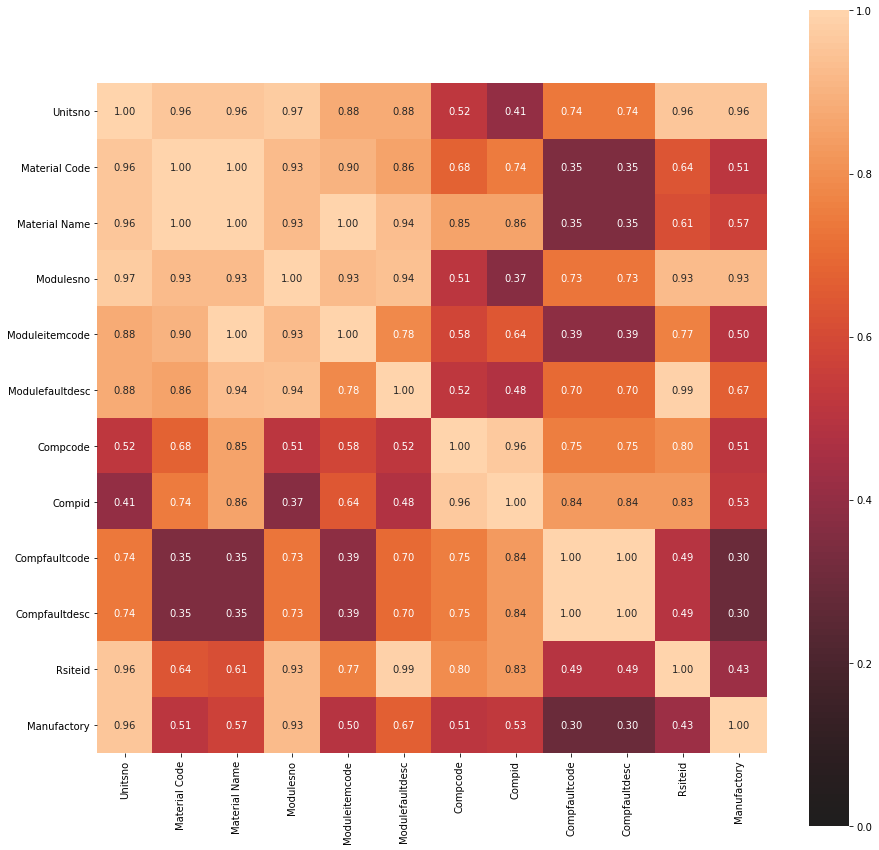

{'corr':                   Unitsno  Material Code  Material Name  Modulesno  \
 Unitsno          1.000000       0.957841       0.957616   0.969988   
 Material Code    0.957841       1.000000       0.999765   0.929579   
 Material Name    0.957616       0.999765       1.000000   0.929361   
 Modulesno        0.969988       0.929579       0.929361   1.000000   
 Moduleitemcode   0.876573       0.900018       0.998487   0.929471   
 Modulefaultdesc  0.880018       0.855659       0.936342   0.938922   
 Compcode         0.518292       0.675991       0.853646   0.508967   
 Compid           0.405802       0.744754       0.856226   0.367889   
 Compfaultcode    0.740464       0.349271       0.349492   0.731729   
 Compfaultdesc    0.740464       0.349271       0.349492   0.731729   
 Rsiteid          0.957588       0.638299       0.611606   0.929333   
 Manufactory      0.957701       0.512673       0.565234   0.929442   
 
                  Moduleitemcode  Modulefaultdesc  Compcode    Comp

In [17]:
# Calculate the correlation/strength-of-association of features in data-set
# with categorical features using:
# Cramer's V or Theil's U for categorical-categorical cases
        
associations(df_RCTool_categorical, nom_nom_assoc='cramer', figsize=(15, 15), cmap=None, cbar=True)

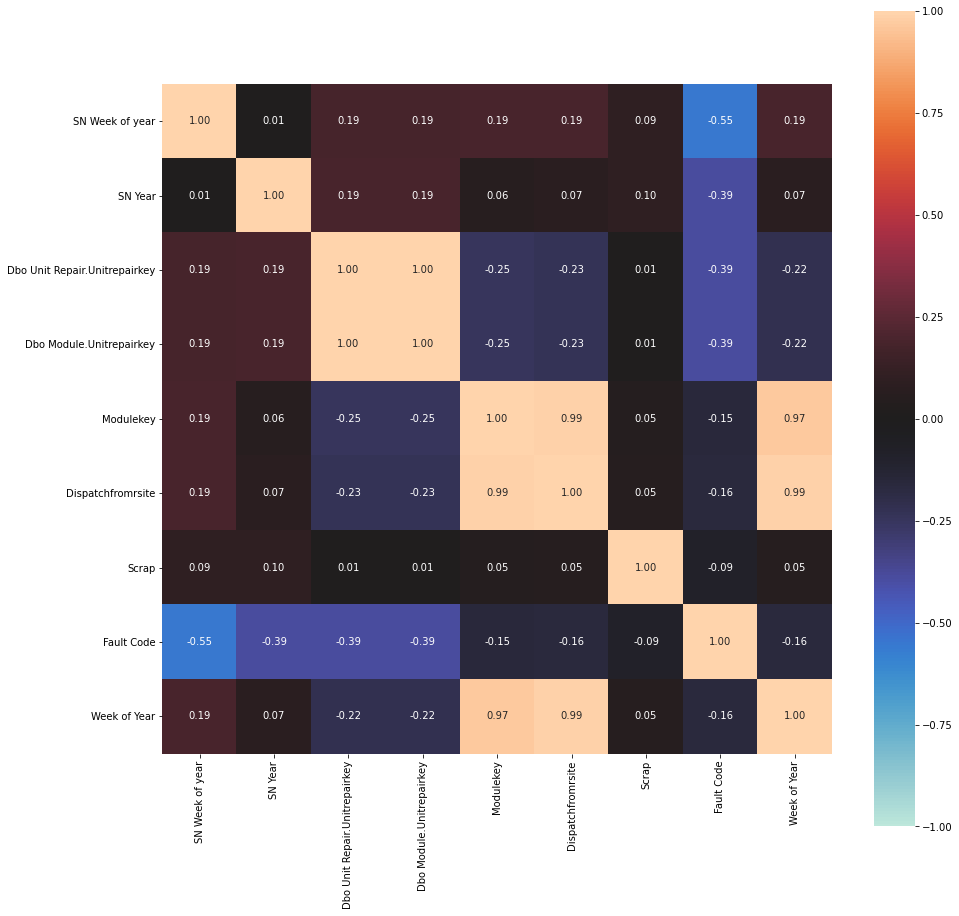

{'corr':                                SN Week of year   SN Year  \
 SN Week of year                       1.000000  0.008162   
 SN Year                               0.008162  1.000000   
 Dbo Unit Repair.Unitrepairkey         0.186425  0.194964   
 Dbo Module.Unitrepairkey              0.186425  0.194964   
 Modulekey                             0.191305  0.062028   
 Dispatchfromrsite                     0.193282  0.072677   
 Scrap                                 0.093836  0.101395   
 Fault Code                           -0.552041 -0.385495   
 Week of Year                          0.194797  0.073652   
 
                                Dbo Unit Repair.Unitrepairkey  \
 SN Week of year                                     0.186425   
 SN Year                                             0.194964   
 Dbo Unit Repair.Unitrepairkey                       1.000000   
 Dbo Module.Unitrepairkey                            1.000000   
 Modulekey                                          -0.

In [18]:
# Calculate the correlation/strength-of-association of features in data-set
# with continuous features using:
# Pearson's R for continuous-continuous cases

associations(df_RCTool_numerical, nom_nom_assoc='pearson', figsize=(15, 15), cmap=None, cbar=True)

### 4. Build Seaborn scatter plots

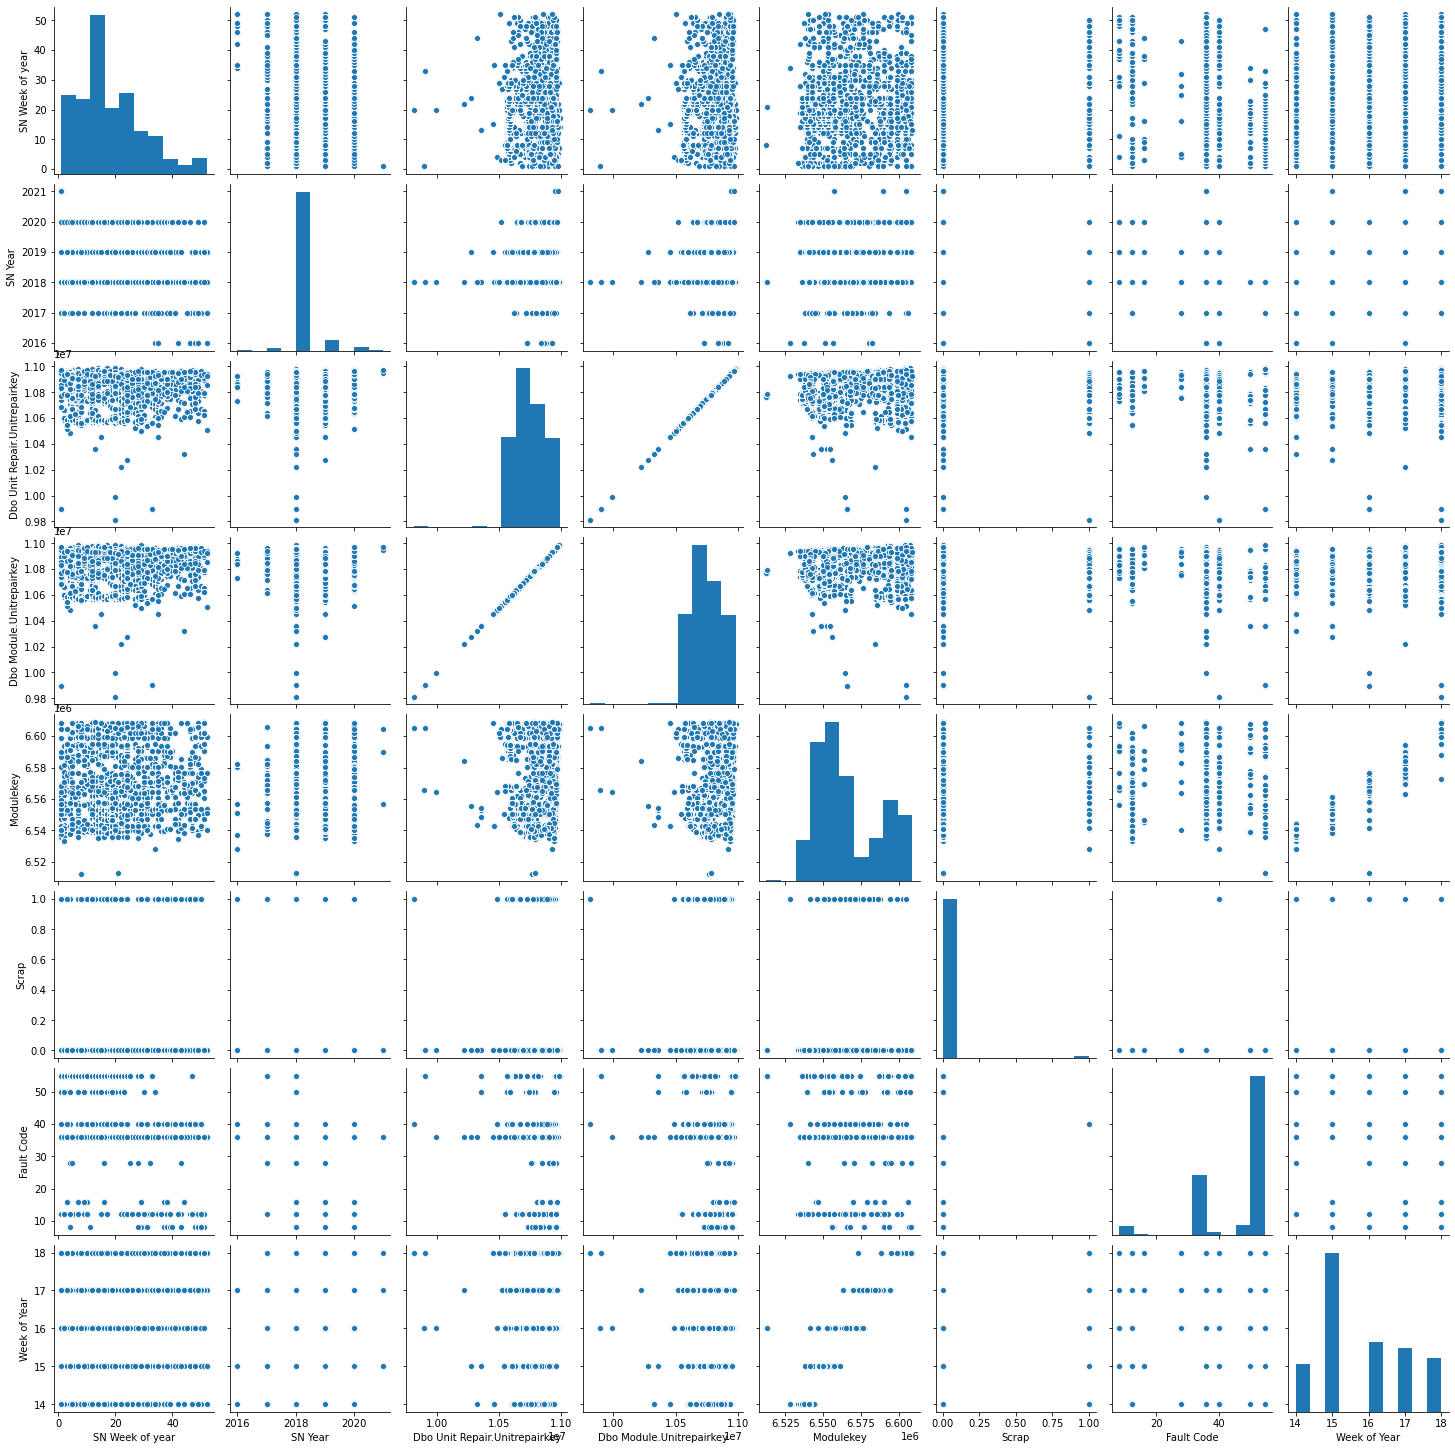

In [19]:
import seaborn as sns
sns.pairplot(df_RCTool)

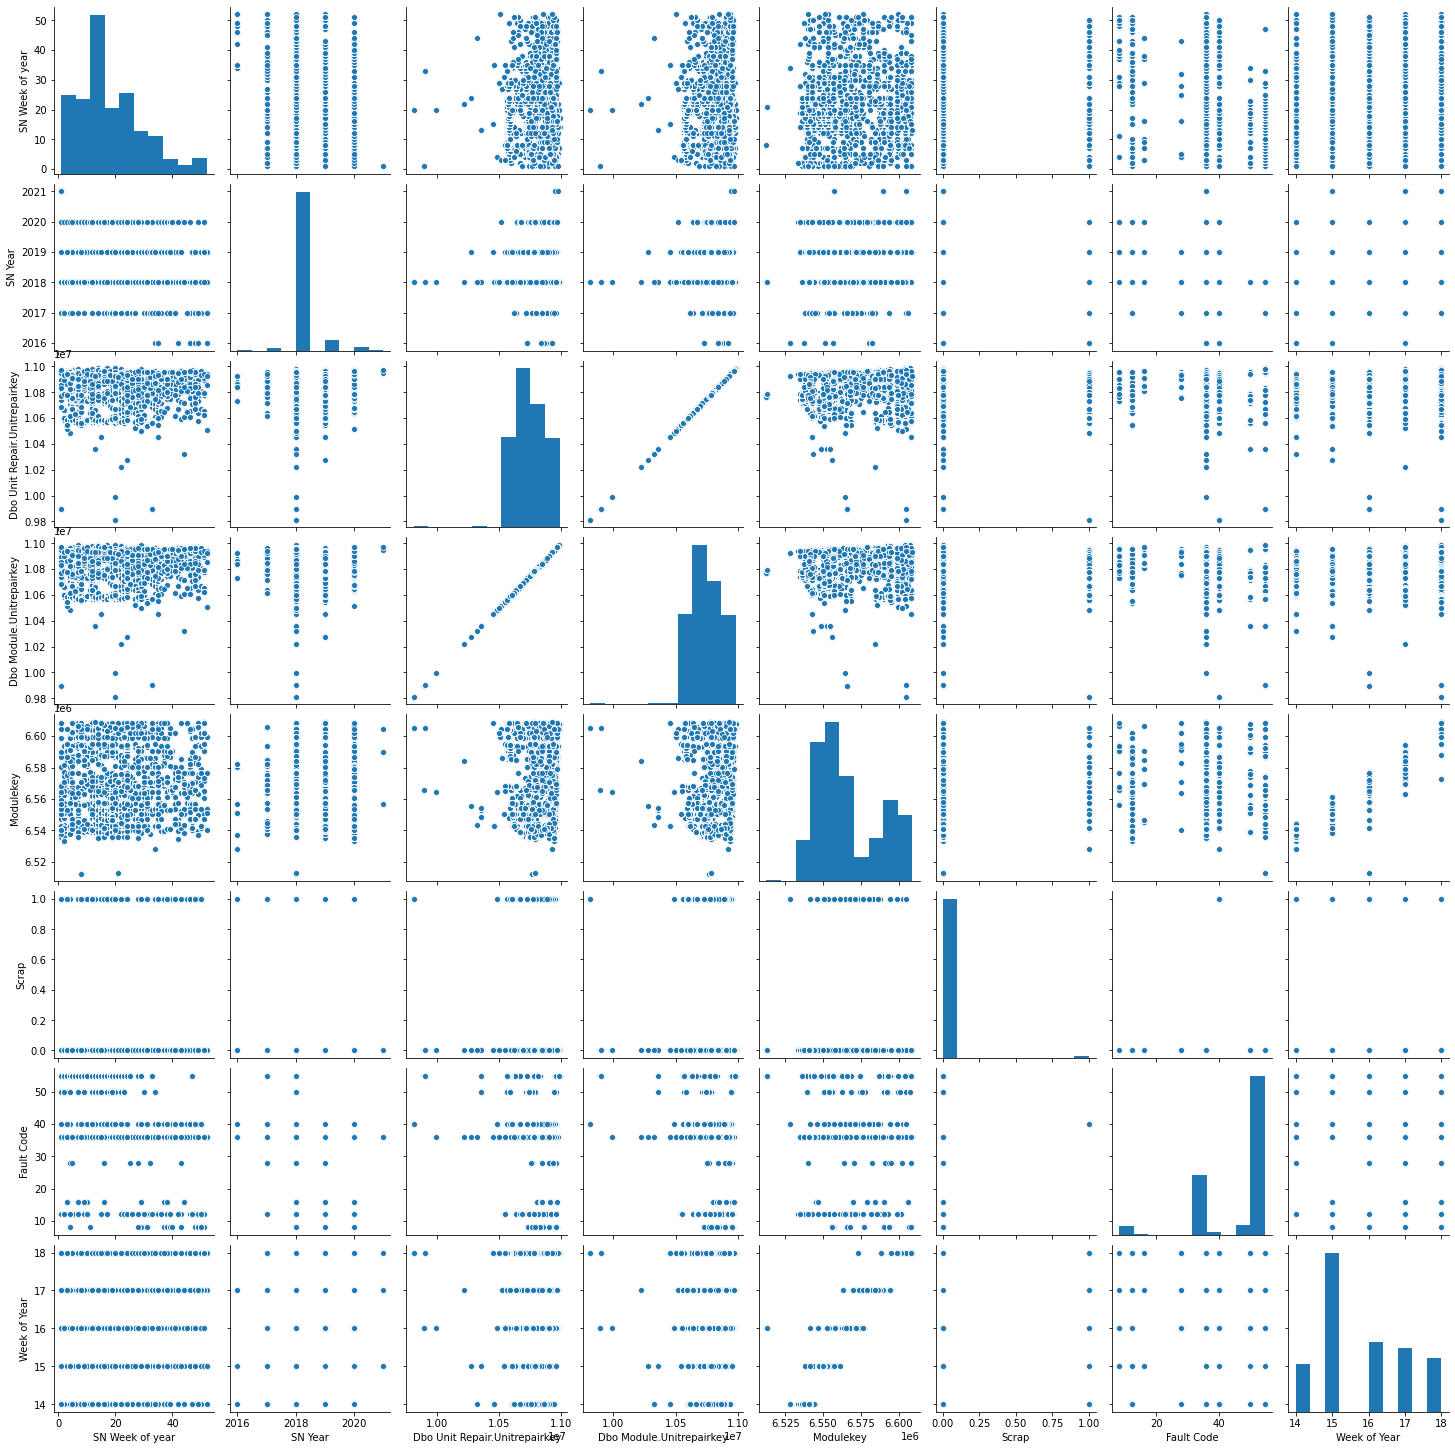

In [20]:
sns.pairplot(df_RCTool_numerical)

### 5. Build Matplotlib boxplots

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
numeric_features = ['SN Week of year', 'SN Year', 'Dbo Unit Repair.Unitrepairkey', 'Dbo Module.Unitrepairkey',
 'Modulekey', 'Scrap', 'Fault Code', 'Week of Year']

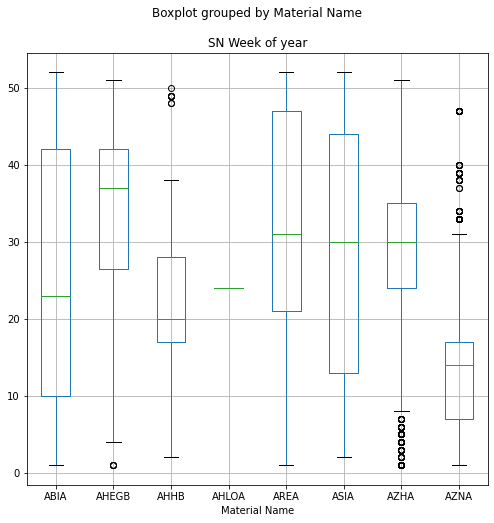

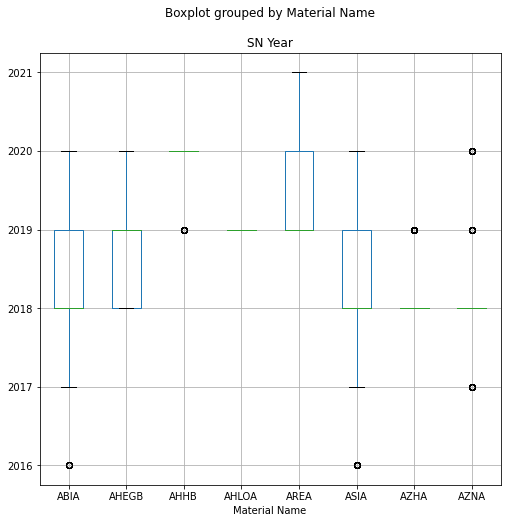

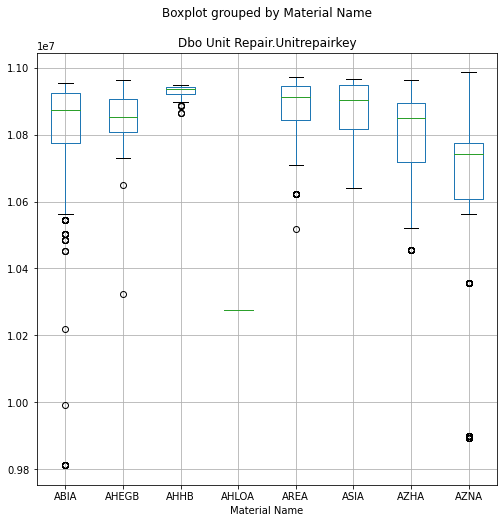

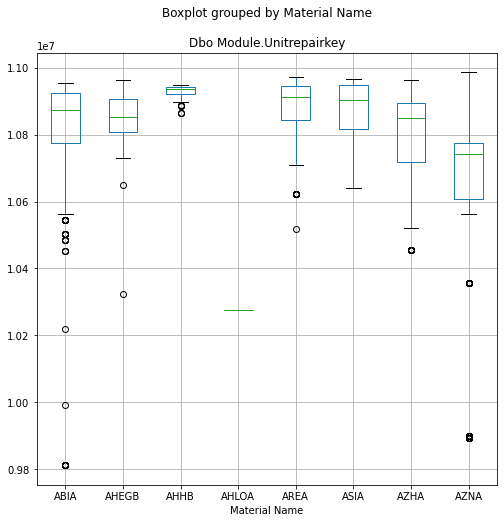

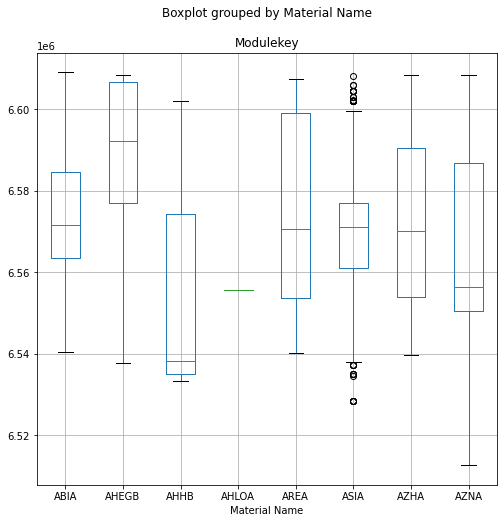

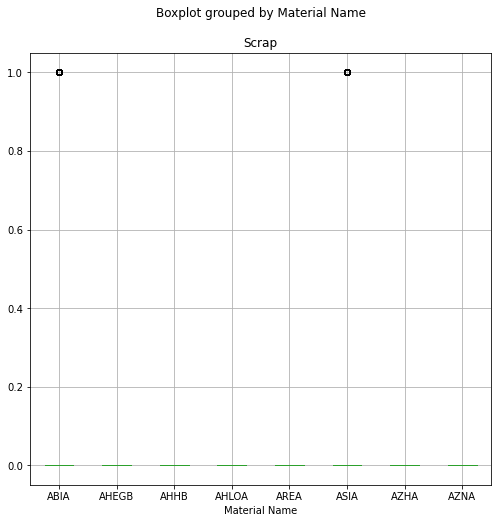

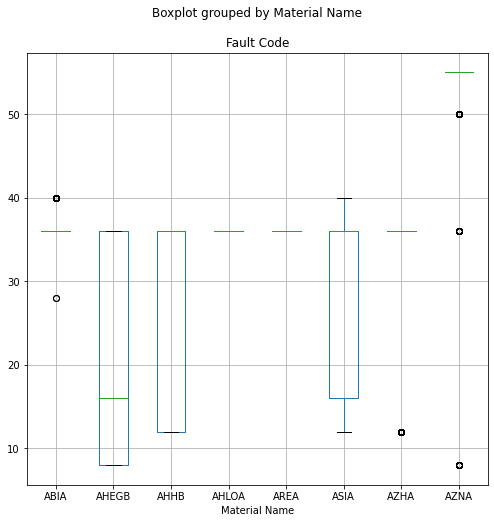

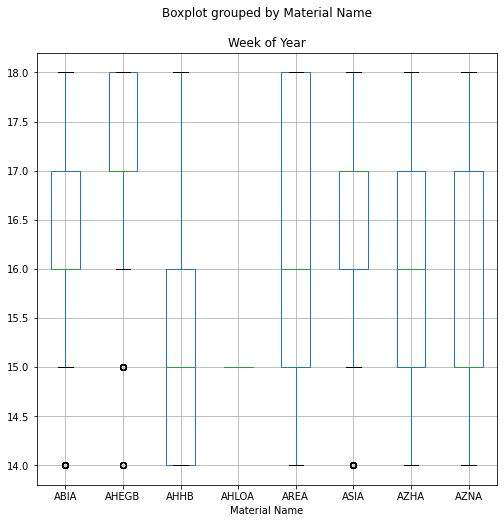

In [23]:
for col in numeric_features:
    df_RCTool.boxplot(column=col, by='Material Name', figsize=(8,8))

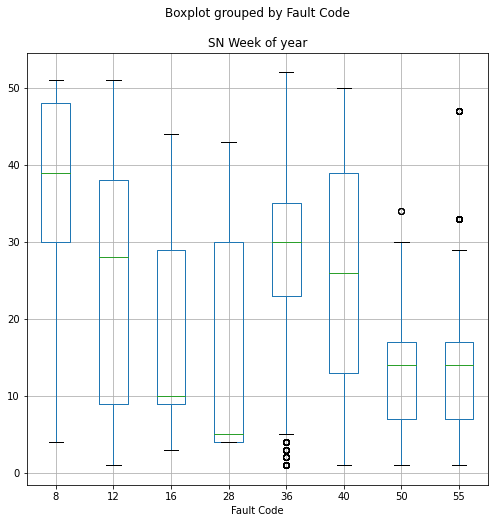

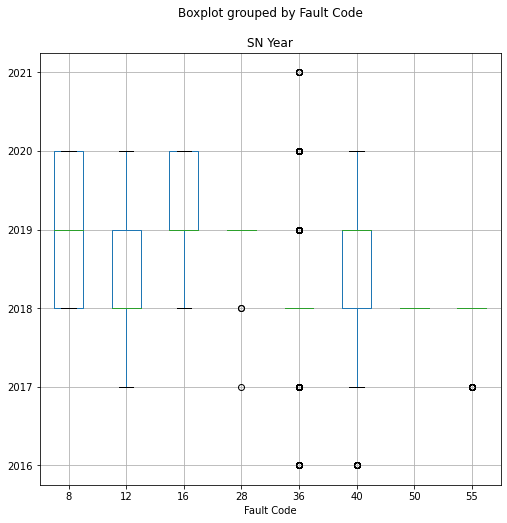

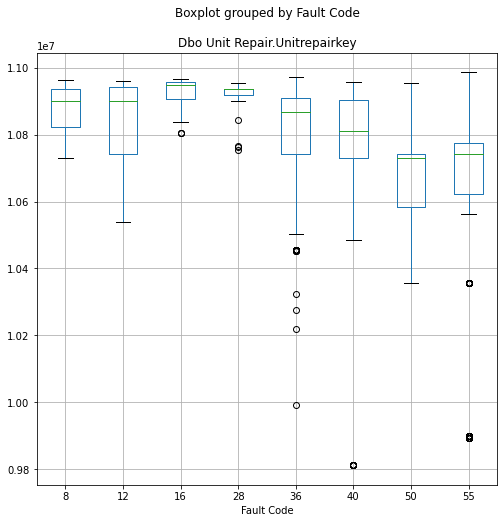

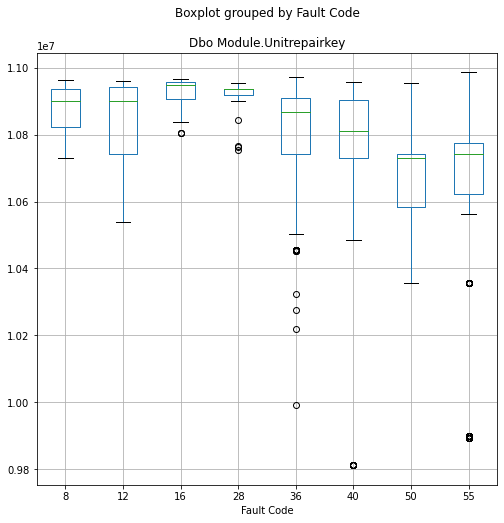

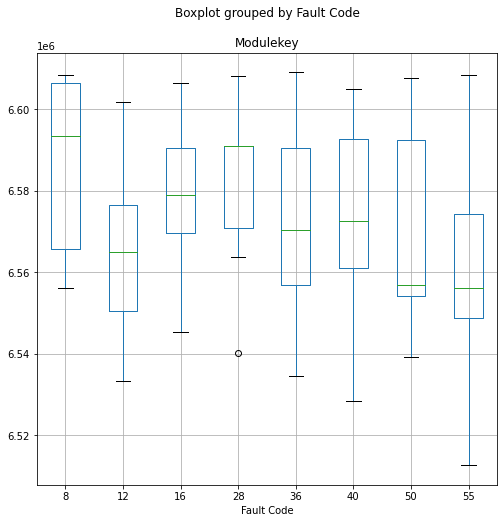

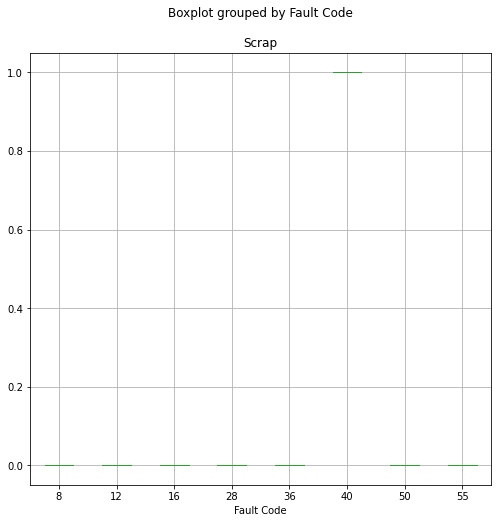

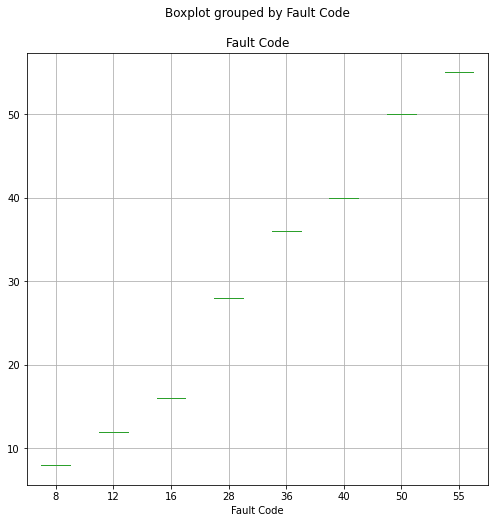

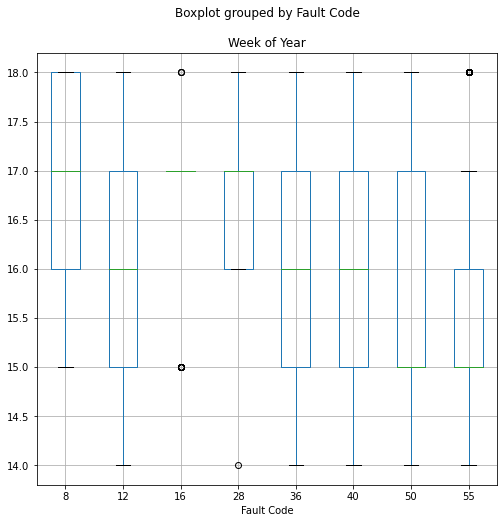

In [24]:
for col in numeric_features:
    df_RCTool.boxplot(column=col, by='Fault Code', figsize=(8,8))

### 6. Statistical parameters for dataframe

In [25]:
df_RCTool.corr()

,SN Week of year,SN Year,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Modulekey,Scrap,Fault Code,Week of Year
SN Week of year,1.000000,0.008162,0.186425,0.186425,0.191305,0.093836,-0.552041,0.194797
SN Year,0.008162,1.000000,0.194964,0.194964,0.062028,0.101395,-0.385495,0.073652
Dbo Unit Repair.Unitrepairkey,0.186425,0.194964,1.000000,1.000000,-0.248831,0.013307,-0.386481,-0.216715
Dbo Module.Unitrepairkey,0.186425,0.194964,1.000000,1.000000,-0.248831,0.013307,-0.386481,-0.216715
Modulekey,0.191305,0.062028,-0.248831,-0.248831,1.000000,0.046636,-0.151951,0.968307
Scrap,0.093836,0.101395,0.013307,0.013307,0.046636,1.000000,-0.085777,0.054073
Fault Code,-0.552041,-0.385495,-0.386481,-0.386481,-0.151951,-0.085777,1.000000,-0.162606
Week of Year,0.194797,0.073652,-0.216715,-0.216715,0.968307,0.054073,-0.162606,1.000000


In [26]:
df_RCTool.corr().style.background_gradient(cmap=None, axis=None)

,SN Week of year,SN Year,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Modulekey,Scrap,Fault Code,Week of Year
SN Week of year,1.000000,0.008162,0.186425,0.186425,0.191305,0.093836,-0.552041,0.194797
SN Year,0.008162,1.000000,0.194964,0.194964,0.062028,0.101395,-0.385495,0.073652
Dbo Unit Repair.Unitrepairkey,0.186425,0.194964,1.000000,1.000000,-0.248831,0.013307,-0.386481,-0.216715
Dbo Module.Unitrepairkey,0.186425,0.194964,1.000000,1.000000,-0.248831,0.013307,-0.386481,-0.216715
Modulekey,0.191305,0.062028,-0.248831,-0.248831,1.000000,0.046636,-0.151951,0.968307
Scrap,0.093836,0.101395,0.013307,0.013307,0.046636,1.000000,-0.085777,0.054073
Fault Code,-0.552041,-0.385495,-0.386481,-0.386481,-0.151951,-0.085777,1.000000,-0.162606
Week of Year,0.194797,0.073652,-0.216715,-0.216715,0.968307,0.054073,-0.162606,1.000000


In [27]:
df_RCTool.describe()

,SN Week of year,SN Year,Dbo Unit Repair.Unitrepairkey,Dbo Module.Unitrepairkey,Modulekey,Scrap,Fault Code,Week of Year
count,17038.000000,17038.000000,1.703800e+04,1.703800e+04,1.703800e+04,17038.000000,17038.000000,17038.000000
mean,17.801092,2018.090151,1.074821e+07,1.074821e+07,6.566456e+06,0.012795,48.235884,15.789412
std,11.411276,0.408681,1.247716e+05,1.247716e+05,2.105105e+04,0.112392,10.931218,1.245015
min,1.000000,2016.000000,9.811666e+06,9.811666e+06,6.512623e+06,0.000000,8.000000,14.000000
25%,9.000000,2018.000000,1.071215e+07,1.071215e+07,6.550758e+06,0.000000,36.000000,15.000000
50%,16.000000,2018.000000,1.074211e+07,1.074211e+07,6.557448e+06,0.000000,55.000000,15.000000
75%,23.000000,2018.000000,1.080190e+07,1.080190e+07,6.586843e+06,0.000000,55.000000,17.000000
max,52.000000,2021.000000,1.098597e+07,1.098597e+07,6.609005e+06,1.000000,55.000000,18.000000
